## Uses PyTrends
* Find Documenation here https://pypi.org/project/pytrends/
* First run pip install pytrends in terminal

In [328]:
# You need to run "pip install pytrends" in terminal in order to import pytrends
from pytrends.request import TrendReq
import pandas as pd
# import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

colnames = ["keywords"]
df = pd.read_csv("search_terms.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-10 2020-08-05', # from and to dates here
     geo='US-IL') # 
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

df = pd.concat(dataset, axis=1)
df.to_csv('trends.csv')
# executionTime = (time.time() - startTime)
# print('Execution time in sec.: ' + str(executionTime))
# print(df)

In [329]:
# df.drop('Domestic Violence Shelter Chicago', inplace=True, axis=1)
df

,domestic violence,domestic abuse,restraining order,order of protection
date,,,,
2020-01-10,15,29,29,27
2020-01-11,0,0,33,31
2020-01-12,17,0,0,0
2020-01-13,28,0,0,0
2020-01-14,28,0,0,51
...,...,...,...,...
2020-08-01,0,0,33,31
2020-08-02,0,0,0,0
2020-08-03,29,29,0,27


In [330]:
df['Domestic Violence Searches'] = df["domestic violence"].rolling(7).mean().shift(-3)
df['Domestic Abuse Searches'] = df["domestic abuse"].rolling(7).mean().shift(-3)
df['Restraining Order Searches'] = df["restraining order"].rolling(7).mean().shift(-3)
df['Order of Protection Searches'] = df["order of protection"].rolling(7).mean().shift(-3)

In [331]:
df.head(250)                                                                      

,domestic violence,domestic abuse,restraining order,order of protection,Domestic Violence Searches,Domestic Abuse Searches,Restraining Order Searches,Order of Protection Searches
date,,,,,,,,
2020-01-10,15,29,29,27,NaN,NaN,NaN,NaN
2020-01-11,0,0,33,31,NaN,NaN,NaN,NaN
2020-01-12,17,0,0,0,NaN,NaN,NaN,NaN
2020-01-13,28,0,0,0,26.000000,4.142857,13.000000,23.428571
2020-01-14,28,0,0,51,28.428571,0.000000,8.857143,19.571429
...,...,...,...,...,...,...,...,...
2020-08-01,0,0,33,31,19.142857,12.571429,13.000000,12.142857
2020-08-02,0,0,0,0,23.428571,12.571429,8.857143,12.142857
2020-08-03,29,29,0,27,NaN,NaN,NaN,NaN


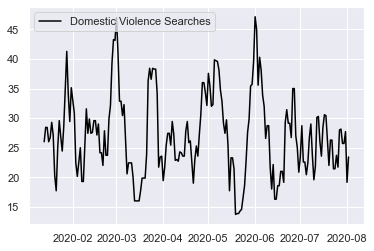

In [332]:
plt.figure()
plt.plot(df.index,df["Domestic Violence Searches"],'black')
# plt.plot(df.index,df["21day_aveDVHlp"],'green')
plt.legend(['Domestic Violence Searches']);

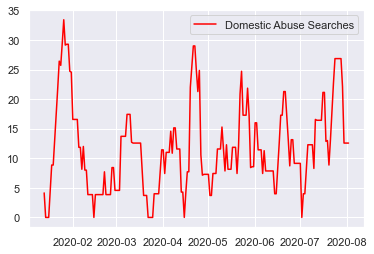

In [333]:
#  df['7day_aveDVHot'] = df["Domestic Violence Hotline"].rolling(7).mean().shift(-3)
plt.figure()
plt.plot(df.index,df["Domestic Abuse Searches"],'red')
plt.legend(['Domestic Abuse Searches']);

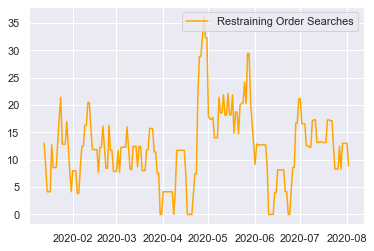

In [334]:
plt.figure()
plt.plot(df.index,df["Restraining Order Searches"],'orange')
plt.legend(['Restraining Order Searches']);

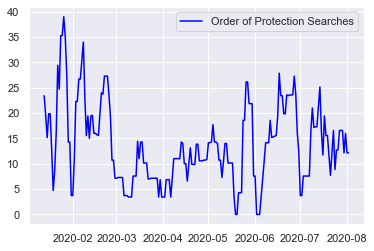

In [335]:
# df['7day_aveOP'] = df["Order of Protection"].rolling(7).mean().shift(-3)
plt.figure()
plt.plot(df.index,df['Order of Protection Searches'],'blue')
plt.legend(['Order of Protection Searches']);

In [336]:
df.reset_index(level=0,inplace=True) #reset_index
# df.columns=['date','Domestic Violence Help','Domestic Violence Hotline','Order of Protection'] #change column names

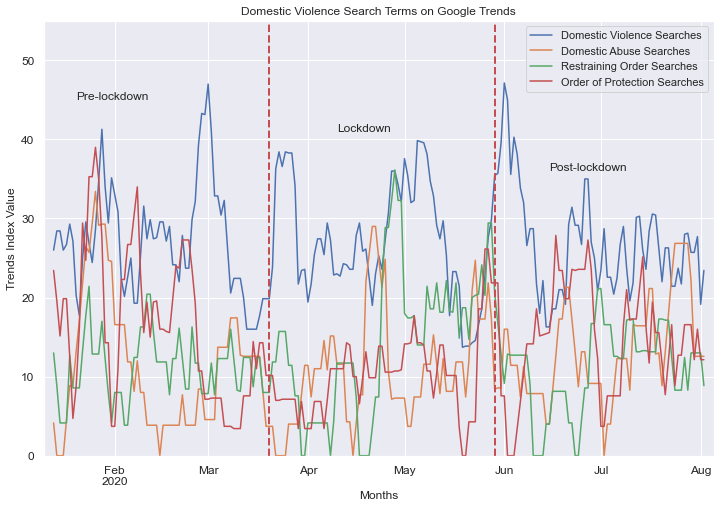

In [337]:
sns.set(color_codes=True)
dx = df.plot(figsize = (12,8),x="date", y=['Domestic Violence Searches','Domestic Abuse Searches','Restraining Order Searches','Order of Protection Searches'], 
             kind="line", title = "Domestic Violence Search Terms on Google Trends")
dx.set_xlabel('Months')
dx.set_ylabel('Trends Index Value')
# plt.xlim(0, 10)
plt.ylim(0, 55)
dx.tick_params(axis='both', which='both', labelsize=12)
plt.axvline(pd.to_datetime('2020-03-20'), color='r', linestyle='--', lw=2)
plt.axvline(pd.to_datetime('2020-05-29'), color='r', linestyle='--', lw=2)
plt.text(pd.to_datetime("2020-01-20"), 45, "Pre-lockdown")
plt.text(pd.to_datetime("2020-04-10"), 41, "Lockdown")
plt.text(pd.to_datetime("2020-06-15"), 36, "Post-lockdown")
plt.savefig('7dayGoogleTrends.png', dpi = 350);

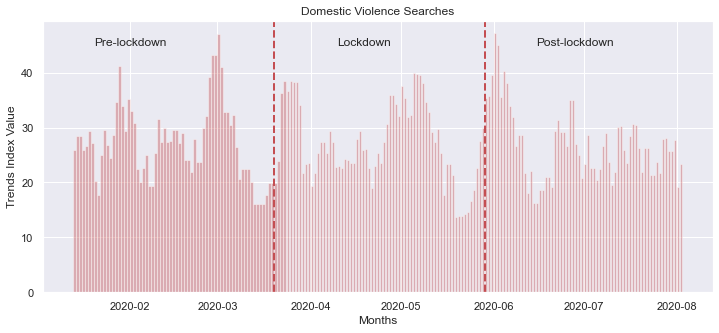

In [338]:
# Create a list indicating where to write x labels and set figure size to adjust for space
y_vals = df["Domestic Violence Searches"]
x_axis = df["date"]
plt.figure(figsize=(12,5))
plt.xlabel('Months')
plt.ylabel('Trends Index Value')
plt.title("Domestic Violence Searches")
plt.axvline(pd.to_datetime('2020-03-20'), color='r', linestyle='--', lw=2)
plt.axvline(pd.to_datetime('2020-05-29'), color='r', linestyle='--', lw=2)
plt.text(pd.to_datetime("2020-01-20"), 45, "Pre-lockdown")
plt.text(pd.to_datetime("2020-04-10"), 45, "Lockdown")
plt.text(pd.to_datetime("2020-06-15"), 45, "Post-lockdown")
plt.bar(x_axis, y_vals, color='r', alpha=0.4,align="edge")
plt.savefig('7dayGoogleTrends-DomesticViolenceSearches-Bar.png', dpi = 350);
plt.show();

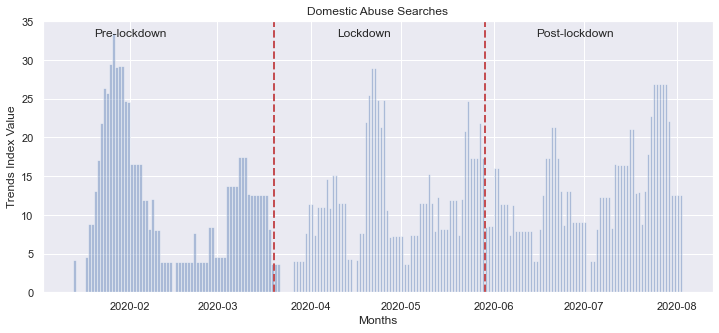

In [339]:
y_vals = df["Domestic Abuse Searches"]
x_axis = df["date"]
plt.figure(figsize=(12,5))
plt.xlabel('Months')
plt.ylabel('Trends Index Value')
plt.title("Domestic Abuse Searches")
plt.axvline(pd.to_datetime('2020-03-20'), color='r', linestyle='--', lw=2)
plt.axvline(pd.to_datetime('2020-05-29'), color='r', linestyle='--', lw=2)
plt.text(pd.to_datetime("2020-01-20"), 33, "Pre-lockdown")
plt.text(pd.to_datetime("2020-04-10"), 33, "Lockdown")
plt.text(pd.to_datetime("2020-06-15"), 33, "Post-lockdown")
plt.bar(x_axis, y_vals, color='b', alpha=0.4,align="edge")
plt.savefig('7dayGoogleTrends-DomesticAbuseSearches-Bar.png', dpi = 350);
plt.show();

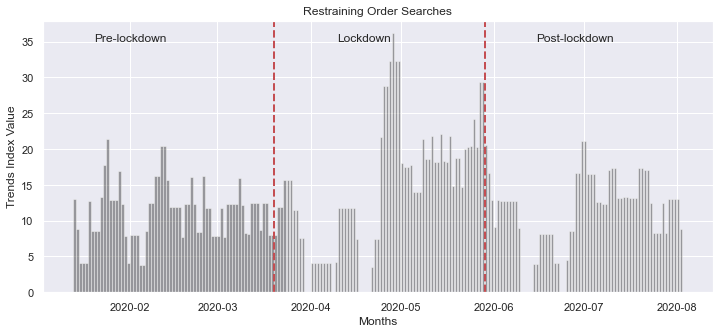

In [340]:
# Create a list indicating where to write x labels and set figure size to adjust for space
y_vals = df["Restraining Order Searches"]
x_axis = df["date"]
plt.figure(figsize=(12,5))
plt.xlabel('Months')
plt.ylabel('Trends Index Value')
plt.title("Restraining Order Searches")
plt.axvline(pd.to_datetime('2020-03-20'), color='r', linestyle='--', lw=2)
plt.axvline(pd.to_datetime('2020-05-29'), color='r', linestyle='--', lw=2)
plt.text(pd.to_datetime("2020-01-20"), 35, "Pre-lockdown")
plt.text(pd.to_datetime("2020-04-10"), 35, "Lockdown")
plt.text(pd.to_datetime("2020-06-15"), 35, "Post-lockdown")
plt.bar(x_axis, y_vals, color='k', alpha=0.4,align="edge")
plt.savefig('7dayGoogleTrends-RestrainingOrderSearches-Bar.png', dpi = 350);
plt.show();

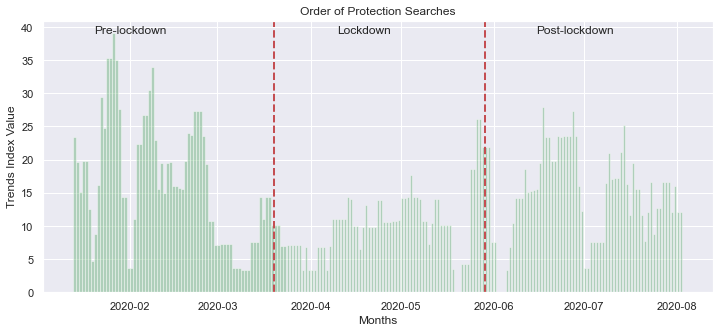

In [342]:
# Create a list indicating where to write x labels and set figure size to adjust for space
y_vals = df["Order of Protection Searches"]
x_axis = df["date"]
plt.figure(figsize=(12,5))
plt.xlabel('Months')
plt.ylabel('Trends Index Value')
plt.title("Order of Protection Searches")
plt.axvline(pd.to_datetime('2020-03-20'), color='r', linestyle='--', lw=2)
plt.axvline(pd.to_datetime('2020-05-29'), color='r', linestyle='--', lw=2)
plt.text(pd.to_datetime("2020-01-20"), 39, "Pre-lockdown")
plt.text(pd.to_datetime("2020-04-10"), 39, "Lockdown")
plt.text(pd.to_datetime("2020-06-15"), 39, "Post-lockdown")
plt.bar(x_axis, y_vals, color='g', alpha=0.4,align="edge")
plt.savefig('7dayGoogleTrends-OrderofProtectionSearches-Bar.png', dpi = 350);
plt.show();